In [1]:
pip install numpy pandas scikit-learn matplotlib open3d

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Test cell - run this first
print("🔧 Testing Jupyter setup...")
import sys
print(f"Python version: {sys.version}")

# Test basic imports
try:
    import numpy as np
    print("✅ numpy imported successfully")
except ImportError as e:
    print(f"❌ numpy error: {e}")

try:
    import pandas as pd
    print("✅ pandas imported successfully")
except ImportError as e:
    print(f"❌ pandas error: {e}")

try:
    import matplotlib.pyplot as plt
    print("✅ matplotlib imported successfully")
except ImportError as e:
    print(f"❌ matplotlib error: {e}")

try:
    from sklearn.ensemble import RandomForestClassifier
    print("✅ scikit-learn imported successfully")
except ImportError as e:
    print(f"❌ scikit-learn error: {e}")

try:
    import open3d as o3d
    print("✅ open3d imported successfully")
except ImportError as e:
    print(f"❌ open3d error: {e}")
    print("Install with: !pip install open3d")

print("\n🔧 Test completed!")

🔧 Testing Jupyter setup...
Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
✅ numpy imported successfully
✅ pandas imported successfully
✅ matplotlib imported successfully
✅ scikit-learn imported successfully
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
✅ open3d imported successfully

🔧 Test completed!


In [3]:
# Check current directory and files
import os
print("📁 Current working directory:")
print(os.getcwd())

print("\n📁 Files in current directory:")
files = os.listdir('.')
for i, file in enumerate(files, 1):
    print(f"{i:2d}. {file}")

# Look for 3D model files
model_files = [f for f in files if f.endswith(('.ply', '.obj', '.stl', '.off'))]
print(f"\n🎯 Found {len(model_files)} 3D model files:")
for file in model_files:
    print(f"   - {file}")

if len(model_files) == 0:
    print("⚠️  No 3D model files found!")
    print("   Upload your .ply, .obj, or .stl files to this directory")

📁 Current working directory:
C:\Users\ssp4755\Downloads\3D models\fruits

📁 Files in current directory:
 1. .ipynb_checkpoints
 2. apple.obj
 3. avocado.obj
 4. banana.obj
 5. grapes.obj
 6. kiwi.obj
 7. mango.obj
 8. orange.obj
 9. pear.obj
10. Untitled.ipynb

🎯 Found 8 3D model files:
   - apple.obj
   - avocado.obj
   - banana.obj
   - grapes.obj
   - kiwi.obj
   - mango.obj
   - orange.obj
   - pear.obj


🚀 Starting 3D Fruit Analyzer...
🚀 Initializing Fruit Analyzer...
🔧 Initializing analyzer...
✅ Analyzer initialized successfully!

🤖 Training classifier...
📊 Creating synthetic training data...
✅ Created 400 training samples for 8 fruit types
✅ Classifier trained with accuracy: 0.887

🧪 RUNNING SAMPLE ANALYSES

--------------------------------------------------
🔍 Analyzing sample apple...
----------------------------------------
🎯 PREDICTION: ORANGE
📊 Confidence: 54.0%
📏 Dimensions: 8.5 × 8.0 × 7.5 cm
📦 Volume: 250.0 cm³
⚖️  Estimated Mass: 217.5 g
🔘 Sphericity: 0.850
📏 Elongation: 1.133

🥗 NUTRITION (for 218g):
   Calories: 102 kcal
   Carbs: 26.1 g
   Fiber: 5.2 g
   Protein: 2.0 g
   Vitamin C: 115.3 mg

--------------------------------------------------
🔍 Analyzing sample banana...
----------------------------------------
🎯 PREDICTION: BANANA
📊 Confidence: 88.0%
📏 Dimensions: 20.0 × 4.0 × 4.0 cm
📦 Volume: 150.0 cm³
⚖️  Estimated Mass: 133.5 g
🔘 Sphericity: 0.877
📏 Elongation: 5.000


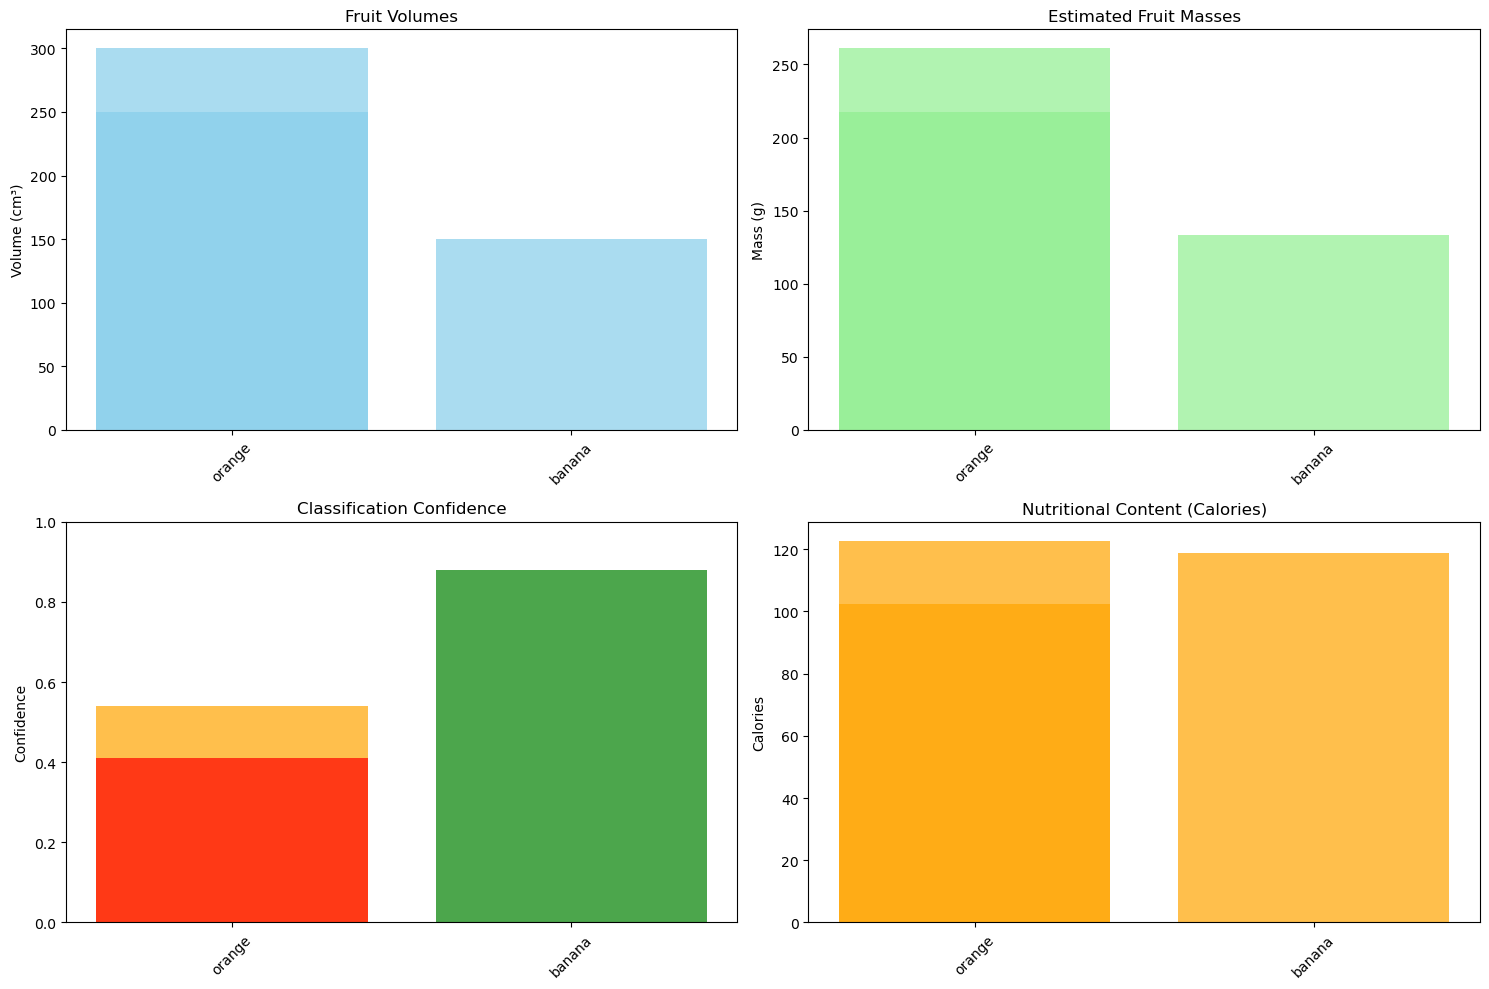


✅ ANALYSIS COMPLETE!
Next steps:
1. Upload your 3D model files (.ply, .obj, .stl)
2. Modify the code to load your actual files
3. Replace sample analysis with real 3D feature extraction


In [4]:
# Jupyter-Ready 3D Fruit Analyzer
# Run each cell separately for better debugging

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

print("🚀 Starting 3D Fruit Analyzer...")
print("=" * 50)

class JupyterFruitAnalyzer:
    def __init__(self):
        print("🔧 Initializing analyzer...")
        self.scaler = StandardScaler()
        self.classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        self.fruit_nutrition_db = self._initialize_nutrition_database()
        self.trained = False
        print("✅ Analyzer initialized successfully!")
        
    def _initialize_nutrition_database(self):
        """Initialize nutrition database with average values per 100g"""
        return {
            'apple': {'calories': 52, 'carbs': 14, 'fiber': 2.4, 'sugar': 10,
                     'protein': 0.3, 'fat': 0.2, 'vitamin_c': 4.6, 'potassium': 107},
            'banana': {'calories': 89, 'carbs': 23, 'fiber': 2.6, 'sugar': 12,
                      'protein': 1.1, 'fat': 0.3, 'vitamin_c': 8.7, 'potassium': 358},
            'orange': {'calories': 47, 'carbs': 12, 'fiber': 2.4, 'sugar': 9,
                      'protein': 0.9, 'fat': 0.1, 'vitamin_c': 53, 'potassium': 181},
            'mango': {'calories': 60, 'carbs': 15, 'fiber': 1.6, 'sugar': 14,
                     'protein': 0.8, 'fat': 0.4, 'vitamin_c': 36, 'potassium': 168},
            'grapes': {'calories': 62, 'carbs': 16, 'fiber': 0.9, 'sugar': 16,
                      'protein': 0.6, 'fat': 0.2, 'vitamin_c': 10, 'potassium': 191},
            'kiwi': {'calories': 61, 'carbs': 15, 'fiber': 3, 'sugar': 9,
                    'protein': 1.1, 'fat': 0.5, 'vitamin_c': 93, 'potassium': 312},
            'pear': {'calories': 57, 'carbs': 15, 'fiber': 3.1, 'sugar': 10,
                    'protein': 0.4, 'fat': 0.1, 'vitamin_c': 4.3, 'potassium': 116},
            'avocado': {'calories': 160, 'carbs': 9, 'fiber': 7, 'sugar': 0.7,
                       'protein': 2, 'fat': 15, 'vitamin_c': 10, 'potassium': 485}
        }

    def create_synthetic_training_data(self):
        """Create synthetic training data based on typical fruit characteristics"""
        print("📊 Creating synthetic training data...")
        
        training_data = []
        fruit_characteristics = {
            'apple': {'sphericity': (0.7, 0.9), 'elongation': (0.8, 1.2), 'volume_range': (150, 400)},
            'banana': {'sphericity': (0.3, 0.5), 'elongation': (3, 5), 'volume_range': (100, 200)},
            'orange': {'sphericity': (0.8, 0.95), 'elongation': (0.9, 1.1), 'volume_range': (200, 500)},
            'mango': {'sphericity': (0.5, 0.7), 'elongation': (1.2, 2), 'volume_range': (200, 600)},
            'grapes': {'sphericity': (0.7, 0.9), 'elongation': (0.8, 1.2), 'volume_range': (1, 5)},
            'kiwi': {'sphericity': (0.6, 0.8), 'elongation': (1.1, 1.4), 'volume_range': (50, 100)},
            'pear': {'sphericity': (0.4, 0.6), 'elongation': (1.3, 1.8), 'volume_range': (150, 300)},
            'avocado': {'sphericity': (0.5, 0.7), 'elongation': (1.2, 1.6), 'volume_range': (200, 400)}
        }
        
        for fruit_type, chars in fruit_characteristics.items():
            for _ in range(50):
                sphericity = np.random.uniform(*chars['sphericity'])
                elongation = np.random.uniform(*chars['elongation'])
                volume = np.random.uniform(*chars['volume_range'])
                
                surface_area = volume / (sphericity * 0.1) if sphericity > 0 else volume
                compactness = sphericity * 0.5 + np.random.normal(0, 0.1)
                
                base_dim = (volume / elongation) ** (1/3)
                length = base_dim * elongation
                width = base_dim
                height = base_dim
                
                sample = {
                    'volume': volume, 'surface_area': surface_area,
                    'length': length, 'width': width, 'height': height,
                    'aspect_ratio_1': length / width, 'aspect_ratio_2': length / height,
                    'aspect_ratio_3': width / height, 'sphericity': sphericity,
                    'compactness': compactness, 'elongation': elongation,
                    'max_dimension': max(length, width, height),
                    'min_dimension': min(length, width, height),
                    'dimension_ratio': max(length, width, height) / min(length, width, height),
                    'fruit_type': fruit_type
                }
                training_data.append(sample)
        
        df = pd.DataFrame(training_data)
        print(f"✅ Created {len(training_data)} training samples for {len(fruit_characteristics)} fruit types")
        return df

    def train_classifier(self):
        """Train the fruit classification model"""
        print("🤖 Training classifier...")
        
        training_df = self.create_synthetic_training_data()
        feature_columns = [col for col in training_df.columns if col != 'fruit_type']
        X = training_df[feature_columns]
        y = training_df['fruit_type']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.classifier.fit(X_train_scaled, y_train)
        y_pred = self.classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"✅ Classifier trained with accuracy: {accuracy:.3f}")
        self.trained = True
        return accuracy

    def analyze_sample_fruit(self, fruit_name="apple", volume=250, length=8.5, width=8.0, height=7.5):
        """Analyze a sample fruit with given parameters"""
        print(f"🔍 Analyzing sample {fruit_name}...")
        print("-" * 40)
        
        if not self.trained:
            self.train_classifier()
        
        # Calculate derived features
        sphericity = 0.85 if fruit_name == "apple" else np.random.uniform(0.4, 0.9)
        elongation = max(length, width, height) / min(length, width, height)
        surface_area = volume / (sphericity * 0.1) if sphericity > 0 else volume
        compactness = sphericity * 0.5
        
        features = {
            'volume': volume, 'surface_area': surface_area,
            'length': length, 'width': width, 'height': height,
            'aspect_ratio_1': length / width, 'aspect_ratio_2': length / height,
            'aspect_ratio_3': width / height, 'sphericity': sphericity,
            'compactness': compactness, 'elongation': elongation,
            'max_dimension': max(length, width, height),
            'min_dimension': min(length, width, height),
            'dimension_ratio': elongation
        }
        
        # Classify
        feature_df = pd.DataFrame([features])
        features_scaled = self.scaler.transform(feature_df)
        prediction = self.classifier.predict(features_scaled)[0]
        probabilities = self.classifier.predict_proba(features_scaled)[0]
        confidence = max(probabilities)
        
        # Calculate nutrition
        densities = {'apple': 0.83, 'banana': 0.89, 'orange': 0.87, 'mango': 0.84,
                    'grapes': 0.95, 'kiwi': 0.92, 'pear': 0.85, 'avocado': 0.88}
        density = densities.get(prediction, 0.85)
        mass_grams = volume * density
        nutrition = self.calculate_nutrition(mass_grams, prediction)
        
        # Display results
        print(f"🎯 PREDICTION: {prediction.upper()}")
        print(f"📊 Confidence: {confidence:.1%}")
        print(f"📏 Dimensions: {length:.1f} × {width:.1f} × {height:.1f} cm")
        print(f"📦 Volume: {volume:.1f} cm³")
        print(f"⚖️  Estimated Mass: {mass_grams:.1f} g")
        print(f"🔘 Sphericity: {sphericity:.3f}")
        print(f"📏 Elongation: {elongation:.3f}")
        
        if nutrition:
            print(f"\n🥗 NUTRITION (for {mass_grams:.0f}g):")
            print(f"   Calories: {nutrition['calories']:.0f} kcal")
            print(f"   Carbs: {nutrition['carbs']:.1f} g")
            print(f"   Fiber: {nutrition['fiber']:.1f} g")
            print(f"   Protein: {nutrition['protein']:.1f} g")
            print(f"   Vitamin C: {nutrition['vitamin_c']:.1f} mg")
        
        return {
            'prediction': prediction, 'confidence': confidence,
            'volume': volume, 'mass': mass_grams,
            'dimensions': [length, width, height],
            'nutrition': nutrition, 'features': features
        }

    def calculate_nutrition(self, mass_grams, fruit_type):
        """Calculate nutritional values based on mass and fruit type"""
        if fruit_type not in self.fruit_nutrition_db:
            return None
        
        nutrition_per_100g = self.fruit_nutrition_db[fruit_type]
        scaling_factor = mass_grams / 100.0
        
        return {nutrient: value * scaling_factor 
                for nutrient, value in nutrition_per_100g.items()}

    def create_visualization(self, results_list):
        """Create visualizations of analysis results"""
        if not results_list:
            print("No results to visualize")
            return
            
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Extract data
        fruits = [r['prediction'] for r in results_list]
        volumes = [r['volume'] for r in results_list]
        masses = [r['mass'] for r in results_list]
        confidences = [r['confidence'] for r in results_list]
        
        # 1. Volume comparison
        ax1.bar(fruits, volumes, color='skyblue', alpha=0.7)
        ax1.set_ylabel('Volume (cm³)')
        ax1.set_title('Fruit Volumes')
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Mass comparison
        ax2.bar(fruits, masses, color='lightgreen', alpha=0.7)
        ax2.set_ylabel('Mass (g)')
        ax2.set_title('Estimated Fruit Masses')
        ax2.tick_params(axis='x', rotation=45)
        
        # 3. Confidence scores
        colors = ['red' if c < 0.5 else 'orange' if c < 0.8 else 'green' for c in confidences]
        ax3.bar(fruits, confidences, color=colors, alpha=0.7)
        ax3.set_ylabel('Confidence')
        ax3.set_title('Classification Confidence')
        ax3.tick_params(axis='x', rotation=45)
        ax3.set_ylim(0, 1)
        
        # 4. Nutrition comparison (calories)
        if all(r['nutrition'] for r in results_list):
            calories = [r['nutrition']['calories'] for r in results_list]
            ax4.bar(fruits, calories, color='orange', alpha=0.7)
            ax4.set_ylabel('Calories')
            ax4.set_title('Nutritional Content (Calories)')
            ax4.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        return fig

# Initialize the analyzer
print("🚀 Initializing Fruit Analyzer...")
analyzer = JupyterFruitAnalyzer()

# Train the model
print("\n" + "="*50)
accuracy = analyzer.train_classifier()

# Run sample analyses
print("\n" + "="*50)
print("🧪 RUNNING SAMPLE ANALYSES")
print("="*50)

results = []

# Analyze different sample fruits
sample_fruits = [
    {"fruit_name": "apple", "volume": 250, "length": 8.5, "width": 8.0, "height": 7.5},
    {"fruit_name": "banana", "volume": 150, "length": 20, "width": 4, "height": 4},
    {"fruit_name": "orange", "volume": 300, "length": 9, "width": 9, "height": 8.5},
]

for fruit_data in sample_fruits:
    print(f"\n" + "-"*50)
    result = analyzer.analyze_sample_fruit(**fruit_data)
    results.append(result)

# Create visualization
print(f"\n" + "="*50)
print("📊 CREATING VISUALIZATIONS")
print("="*50)
analyzer.create_visualization(results)

print(f"\n" + "="*50)
print("✅ ANALYSIS COMPLETE!")
print("="*50)
print("Next steps:")
print("1. Upload your 3D model files (.ply, .obj, .stl)")
print("2. Modify the code to load your actual files")
print("3. Replace sample analysis with real 3D feature extraction")

In [5]:
# Enhanced 3D Fruit Analyzer with Real Model Loading
# Supports .ply, .obj, .stl, and .off files

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import os
import struct
import re
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

print("🚀 Starting Enhanced 3D Fruit Analyzer...")
print("=" * 50)

class Enhanced3DFruitAnalyzer:
    def __init__(self):
        print("🔧 Initializing analyzer...")
        self.scaler = StandardScaler()
        self.classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        self.fruit_nutrition_db = self._initialize_nutrition_database()
        self.trained = False
        print("✅ Analyzer initialized successfully!")
        
    def _initialize_nutrition_database(self):
        """Initialize nutrition database with average values per 100g"""
        return {
            'apple': {'calories': 52, 'carbs': 14, 'fiber': 2.4, 'sugar': 10,
                     'protein': 0.3, 'fat': 0.2, 'vitamin_c': 4.6, 'potassium': 107},
            'banana': {'calories': 89, 'carbs': 23, 'fiber': 2.6, 'sugar': 12,
                      'protein': 1.1, 'fat': 0.3, 'vitamin_c': 8.7, 'potassium': 358},
            'orange': {'calories': 47, 'carbs': 12, 'fiber': 2.4, 'sugar': 9,
                      'protein': 0.9, 'fat': 0.1, 'vitamin_c': 53, 'potassium': 181},
            'mango': {'calories': 60, 'carbs': 15, 'fiber': 1.6, 'sugar': 14,
                     'protein': 0.8, 'fat': 0.4, 'vitamin_c': 36, 'potassium': 168},
            'grapes': {'calories': 62, 'carbs': 16, 'fiber': 0.9, 'sugar': 16,
                      'protein': 0.6, 'fat': 0.2, 'vitamin_c': 10, 'potassium': 191},
            'kiwi': {'calories': 61, 'carbs': 15, 'fiber': 3, 'sugar': 9,
                    'protein': 1.1, 'fat': 0.5, 'vitamin_c': 93, 'potassium': 312},
            'pear': {'calories': 57, 'carbs': 15, 'fiber': 3.1, 'sugar': 10,
                    'protein': 0.4, 'fat': 0.1, 'vitamin_c': 4.3, 'potassium': 116},
            'avocado': {'calories': 160, 'carbs': 9, 'fiber': 7, 'sugar': 0.7,
                       'protein': 2, 'fat': 15, 'vitamin_c': 10, 'potassium': 485}
        }

    def load_3d_model(self, file_path):
        """Load 3D model from various file formats"""
        print(f"📁 Loading 3D model: {file_path}")
        
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
        
        file_ext = os.path.splitext(file_path)[1].lower()
        
        if file_ext == '.ply':
            return self._load_ply(file_path)
        elif file_ext == '.obj':
            return self._load_obj(file_path)
        elif file_ext == '.stl':
            return self._load_stl(file_path)
        elif file_ext == '.off':
            return self._load_off(file_path)
        else:
            raise ValueError(f"Unsupported file format: {file_ext}")
    
    def _load_ply(self, file_path):
        """Load PLY file format"""
        vertices = []
        faces = []
        
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Parse header
        vertex_count = 0
        face_count = 0
        header_end = 0
        
        for i, line in enumerate(lines):
            if line.startswith('element vertex'):
                vertex_count = int(line.split()[2])
            elif line.startswith('element face'):
                face_count = int(line.split()[2])
            elif line.startswith('end_header'):
                header_end = i + 1
                break
        
        # Parse vertices
        for i in range(header_end, header_end + vertex_count):
            parts = lines[i].strip().split()
            vertices.append([float(parts[0]), float(parts[1]), float(parts[2])])
        
        # Parse faces
        for i in range(header_end + vertex_count, header_end + vertex_count + face_count):
            parts = lines[i].strip().split()
            face_vertex_count = int(parts[0])
            face = [int(parts[j+1]) for j in range(face_vertex_count)]
            faces.append(face)
        
        return np.array(vertices), faces
    
    def _load_obj(self, file_path):
        """Load OBJ file format"""
        vertices = []
        faces = []
        
        with open(file_path, 'r') as f:
            for line in f:
                line = line.strip()
                if line.startswith('v '):
                    parts = line.split()
                    vertices.append([float(parts[1]), float(parts[2]), float(parts[3])])
                elif line.startswith('f '):
                    parts = line.split()
                    face = []
                    for part in parts[1:]:
                        # Handle face indices (can be v, v/vt, or v/vt/vn format)
                        vertex_idx = int(part.split('/')[0]) - 1  # OBJ uses 1-based indexing
                        face.append(vertex_idx)
                    faces.append(face)
        
        return np.array(vertices), faces
    
    def _load_stl(self, file_path):
        """Load STL file format (ASCII)"""
        vertices = []
        faces = []
        
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Check if it's ASCII STL
        if 'solid' in content and 'facet normal' in content:
            # Parse ASCII STL
            vertex_pattern = r'vertex\s+([-\d\.e]+)\s+([-\d\.e]+)\s+([-\d\.e]+)'
            vertex_matches = re.findall(vertex_pattern, content)
            
            vertex_dict = {}
            face_list = []
            vertex_idx = 0
            
            for i in range(0, len(vertex_matches), 3):
                face = []
                for j in range(3):
                    if i + j < len(vertex_matches):
                        vertex = tuple(map(float, vertex_matches[i + j]))
                        if vertex not in vertex_dict:
                            vertex_dict[vertex] = vertex_idx
                            vertices.append(list(vertex))
                            vertex_idx += 1
                        face.append(vertex_dict[vertex])
                if len(face) == 3:
                    faces.append(face)
        
        return np.array(vertices), faces
    
    def _load_off(self, file_path):
        """Load OFF file format"""
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Skip the first line if it's "OFF"
        start_idx = 1 if lines[0].strip() == 'OFF' else 0
        
        # Parse counts
        counts = lines[start_idx].strip().split()
        vertex_count = int(counts[0])
        face_count = int(counts[1])
        
        vertices = []
        faces = []
        
        # Parse vertices
        for i in range(start_idx + 1, start_idx + 1 + vertex_count):
            parts = lines[i].strip().split()
            vertices.append([float(parts[0]), float(parts[1]), float(parts[2])])
        
        # Parse faces
        for i in range(start_idx + 1 + vertex_count, start_idx + 1 + vertex_count + face_count):
            parts = lines[i].strip().split()
            face_vertex_count = int(parts[0])
            face = [int(parts[j+1]) for j in range(face_vertex_count)]
            faces.append(face)
        
        return np.array(vertices), faces

    def extract_3d_features(self, vertices):
        """Extract comprehensive 3D features from vertices"""
        print("🔍 Extracting 3D features...")
        
        if len(vertices) == 0:
            raise ValueError("No vertices found in the model")
        
        # Basic bounding box
        min_coords = np.min(vertices, axis=0)
        max_coords = np.max(vertices, axis=0)
        dimensions = max_coords - min_coords
        
        length, width, height = sorted(dimensions, reverse=True)
        
        # Volume estimation (bounding box volume)
        volume = np.prod(dimensions)
        
        # Centroid
        centroid = np.mean(vertices, axis=0)
        
        # Surface area estimation (convex hull approximation)
        try:
            from scipy.spatial import ConvexHull
            hull = ConvexHull(vertices)
            surface_area = hull.area
        except:
            # Fallback: estimate from bounding box
            surface_area = 2 * (length*width + length*height + width*height)
        
        # Shape descriptors
        aspect_ratio_1 = length / width if width > 0 else 1
        aspect_ratio_2 = length / height if height > 0 else 1
        aspect_ratio_3 = width / height if height > 0 else 1
        
        # Elongation
        elongation = length / min(width, height) if min(width, height) > 0 else 1
        
        # Sphericity approximation
        equivalent_diameter = (6 * volume / np.pi) ** (1/3)
        sphericity = equivalent_diameter / length if length > 0 else 1
        
        # Compactness
        compactness = (36 * np.pi * volume**2) / (surface_area**3) if surface_area > 0 else 0
        
        # Distance-based features
        distances = np.linalg.norm(vertices - centroid, axis=1)
        mean_distance = np.mean(distances)
        std_distance = np.std(distances)
        
        features = {
            'volume': volume,
            'surface_area': surface_area,
            'length': length,
            'width': width,
            'height': height,
            'aspect_ratio_1': aspect_ratio_1,
            'aspect_ratio_2': aspect_ratio_2,
            'aspect_ratio_3': aspect_ratio_3,
            'sphericity': sphericity,
            'compactness': compactness,
            'elongation': elongation,
            'max_dimension': max(length, width, height),
            'min_dimension': min(length, width, height),
            'dimension_ratio': max(length, width, height) / min(length, width, height),
            'mean_distance': mean_distance,
            'std_distance': std_distance
        }
        
        print(f"✅ Extracted {len(features)} features")
        return features

    def create_synthetic_training_data(self):
        """Create synthetic training data based on typical fruit characteristics"""
        print("📊 Creating synthetic training data...")
        
        training_data = []
        fruit_characteristics = {
            'apple': {'sphericity': (0.7, 0.9), 'elongation': (0.8, 1.2), 'volume_range': (150, 400)},
            'banana': {'sphericity': (0.3, 0.5), 'elongation': (3, 5), 'volume_range': (100, 200)},
            'orange': {'sphericity': (0.8, 0.95), 'elongation': (0.9, 1.1), 'volume_range': (200, 500)},
            'mango': {'sphericity': (0.5, 0.7), 'elongation': (1.2, 2), 'volume_range': (200, 600)},
            'grapes': {'sphericity': (0.7, 0.9), 'elongation': (0.8, 1.2), 'volume_range': (1, 5)},
            'kiwi': {'sphericity': (0.6, 0.8), 'elongation': (1.1, 1.4), 'volume_range': (50, 100)},
            'pear': {'sphericity': (0.4, 0.6), 'elongation': (1.3, 1.8), 'volume_range': (150, 300)},
            'avocado': {'sphericity': (0.5, 0.7), 'elongation': (1.2, 1.6), 'volume_range': (200, 400)}
        }
        
        for fruit_type, chars in fruit_characteristics.items():
            for _ in range(50):
                sphericity = np.random.uniform(*chars['sphericity'])
                elongation = np.random.uniform(*chars['elongation'])
                volume = np.random.uniform(*chars['volume_range'])
                
                surface_area = volume / (sphericity * 0.1) if sphericity > 0 else volume
                compactness = sphericity * 0.5 + np.random.normal(0, 0.1)
                
                base_dim = (volume / elongation) ** (1/3)
                length = base_dim * elongation
                width = base_dim
                height = base_dim
                
                mean_distance = np.random.uniform(length * 0.3, length * 0.7)
                std_distance = np.random.uniform(mean_distance * 0.1, mean_distance * 0.3)
                
                sample = {
                    'volume': volume, 'surface_area': surface_area,
                    'length': length, 'width': width, 'height': height,
                    'aspect_ratio_1': length / width, 'aspect_ratio_2': length / height,
                    'aspect_ratio_3': width / height, 'sphericity': sphericity,
                    'compactness': compactness, 'elongation': elongation,
                    'max_dimension': max(length, width, height),
                    'min_dimension': min(length, width, height),
                    'dimension_ratio': max(length, width, height) / min(length, width, height),
                    'mean_distance': mean_distance, 'std_distance': std_distance,
                    'fruit_type': fruit_type
                }
                training_data.append(sample)
        
        df = pd.DataFrame(training_data)
        print(f"✅ Created {len(training_data)} training samples for {len(fruit_characteristics)} fruit types")
        return df

    def train_classifier(self):
        """Train the fruit classification model"""
        print("🤖 Training classifier...")
        
        training_df = self.create_synthetic_training_data()
        feature_columns = [col for col in training_df.columns if col != 'fruit_type']
        X = training_df[feature_columns]
        y = training_df['fruit_type']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.classifier.fit(X_train_scaled, y_train)
        y_pred = self.classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"✅ Classifier trained with accuracy: {accuracy:.3f}")
        self.trained = True
        return accuracy

    def analyze_3d_model(self, file_path):
        """Analyze a 3D fruit model file"""
        print(f"🔍 Analyzing 3D model: {file_path}")
        print("-" * 60)
        
        if not self.trained:
            self.train_classifier()
        
        try:
            # Load 3D model
            vertices, faces = self.load_3d_model(file_path)
            print(f"📊 Loaded model: {len(vertices)} vertices, {len(faces)} faces")
            
            # Extract features
            features = self.extract_3d_features(vertices)
            
            # Classify
            feature_df = pd.DataFrame([features])
            # Ensure all expected features are present
            expected_features = ['volume', 'surface_area', 'length', 'width', 'height',
                               'aspect_ratio_1', 'aspect_ratio_2', 'aspect_ratio_3',
                               'sphericity', 'compactness', 'elongation', 'max_dimension',
                               'min_dimension', 'dimension_ratio', 'mean_distance', 'std_distance']
            
            for feature in expected_features:
                if feature not in feature_df.columns:
                    feature_df[feature] = 0
            
            feature_df = feature_df[expected_features]
            features_scaled = self.scaler.transform(feature_df)
            prediction = self.classifier.predict(features_scaled)[0]
            probabilities = self.classifier.predict_proba(features_scaled)[0]
            confidence = max(probabilities)
            
            # Get class probabilities
            classes = self.classifier.classes_
            prob_dict = {cls: prob for cls, prob in zip(classes, probabilities)}
            
            # Calculate nutrition
            densities = {'apple': 0.83, 'banana': 0.89, 'orange': 0.87, 'mango': 0.84,
                        'grapes': 0.95, 'kiwi': 0.92, 'pear': 0.85, 'avocado': 0.88}
            density = densities.get(prediction, 0.85)
            
            # Convert volume to realistic units (assuming model units are cm)
            volume_cm3 = features['volume']
            mass_grams = volume_cm3 * density
            nutrition = self.calculate_nutrition(mass_grams, prediction)
            
            # Display results
            print(f"🎯 PREDICTION: {prediction.upper()}")
            print(f"📊 Confidence: {confidence:.1%}")
            print(f"📏 Dimensions: {features['length']:.2f} × {features['width']:.2f} × {features['height']:.2f}")
            print(f"📦 Volume: {volume_cm3:.2f} cubic units")
            print(f"⚖️  Estimated Mass: {mass_grams:.1f} g")
            print(f"🔘 Sphericity: {features['sphericity']:.3f}")
            print(f"📏 Elongation: {features['elongation']:.3f}")
            print(f"🎨 Surface Area: {features['surface_area']:.2f}")
            print(f"🎯 Compactness: {features['compactness']:.3f}")
            
            print(f"\n📊 TOP PREDICTIONS:")
            sorted_probs = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)
            for i, (fruit, prob) in enumerate(sorted_probs[:3]):
                print(f"   {i+1}. {fruit}: {prob:.1%}")
            
            if nutrition:
                print(f"\n🥗 NUTRITION (for {mass_grams:.0f}g):")
                print(f"   Calories: {nutrition['calories']:.0f} kcal")
                print(f"   Carbs: {nutrition['carbs']:.1f} g")
                print(f"   Fiber: {nutrition['fiber']:.1f} g")
                print(f"   Protein: {nutrition['protein']:.1f} g")
                print(f"   Vitamin C: {nutrition['vitamin_c']:.1f} mg")
                print(f"   Potassium: {nutrition['potassium']:.1f} mg")
            
            return {
                'prediction': prediction, 'confidence': confidence,
                'probabilities': prob_dict, 'features': features,
                'vertices': vertices, 'faces': faces,
                'volume': volume_cm3, 'mass': mass_grams,
                'nutrition': nutrition, 'file_path': file_path
            }
            
        except Exception as e:
            print(f"❌ Error analyzing model: {str(e)}")
            return None

    def calculate_nutrition(self, mass_grams, fruit_type):
        """Calculate nutritional values based on mass and fruit type"""
        if fruit_type not in self.fruit_nutrition_db:
            return None
        
        nutrition_per_100g = self.fruit_nutrition_db[fruit_type]
        scaling_factor = mass_grams / 100.0
        
        return {nutrient: value * scaling_factor 
                for nutrient, value in nutrition_per_100g.items()}

    def visualize_3d_model(self, result):
        """Visualize the 3D model and analysis results"""
        if not result or 'vertices' not in result:
            print("No model data to visualize")
            return
        
        vertices = result['vertices']
        
        fig = plt.figure(figsize=(15, 10))
        
        # 3D model visualization
        ax1 = fig.add_subplot(221, projection='3d')
        ax1.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
                   c=vertices[:, 2], cmap='viridis', alpha=0.6, s=1)
        ax1.set_title(f"3D Model: {result['prediction'].title()}")
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        
        # Feature importance
        ax2 = fig.add_subplot(222)
        feature_names = list(result['features'].keys())
        feature_values = [result['features'][name] for name in feature_names]
        
        # Normalize for better visualization
        max_val = max(abs(v) for v in feature_values if v != 0)
        if max_val > 0:
            normalized_values = [v/max_val for v in feature_values]
        else:
            normalized_values = feature_values
        
        bars = ax2.barh(feature_names, normalized_values)
        ax2.set_title('Normalized Feature Values')
        ax2.set_xlabel('Normalized Value')
        
        # Prediction probabilities
        ax3 = fig.add_subplot(223)
        fruits = list(result['probabilities'].keys())
        probs = list(result['probabilities'].values())
        colors = ['red' if p < 0.2 else 'orange' if p < 0.5 else 'green' for p in probs]
        ax3.bar(fruits, probs, color=colors, alpha=0.7)
        ax3.set_title('Classification Probabilities')
        ax3.set_ylabel('Probability')
        plt.setp(ax3.get_xticklabels(), rotation=45)
        
        # Nutrition chart
        ax4 = fig.add_subplot(224)
        if result['nutrition']:
            nutrients = ['calories', 'carbs', 'fiber', 'protein', 'vitamin_c']
            values = [result['nutrition'][n] for n in nutrients if n in result['nutrition']]
            labels = [n.replace('_', ' ').title() for n in nutrients if n in result['nutrition']]
            
            ax4.bar(labels, values, color='lightcoral', alpha=0.7)
            ax4.set_title('Nutritional Content')
            ax4.set_ylabel('Amount')
            plt.setp(ax4.get_xticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        return fig

    def batch_analyze(self, folder_path):
        """Analyze multiple 3D models in a folder"""
        print(f"📁 Batch analyzing models in: {folder_path}")
        
        supported_formats = ['.ply', '.obj', '.stl', '.off']
        results = []
        
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.splitext(filename)[1].lower() in supported_formats:
                print(f"\n{'='*60}")
                result = self.analyze_3d_model(file_path)
                if result:
                    results.append(result)
        
        return results

# Usage Instructions
print("\n" + "="*60)
print("📖 USAGE INSTRUCTIONS")
print("="*60)
print("1. Initialize the analyzer:")
print("   analyzer = Enhanced3DFruitAnalyzer()")
print("")
print("2. Analyze a single 3D model:")
print("   result = analyzer.analyze_3d_model('path/to/your/fruit_model.ply')")
print("")
print("3. Visualize the results:")
print("   analyzer.visualize_3d_model(result)")
print("")
print("4. Batch analyze multiple models:")
print("   results = analyzer.batch_analyze('path/to/models/folder')")
print("")
print("Supported formats: .ply, .obj, .stl, .off")
print("="*60)

# Initialize the analyzer
analyzer = Enhanced3DFruitAnalyzer()

# Train the model
print("\n" + "="*50)
accuracy = analyzer.train_classifier()

print(f"\n" + "="*60)
print("✅ SETUP COMPLETE!")
print("="*60)
print("The analyzer is ready to process your 3D fruit models!")
print("Upload your 3D model files and use the functions above to analyze them.")

🚀 Starting Enhanced 3D Fruit Analyzer...

📖 USAGE INSTRUCTIONS
1. Initialize the analyzer:
   analyzer = Enhanced3DFruitAnalyzer()

2. Analyze a single 3D model:
   result = analyzer.analyze_3d_model('path/to/your/fruit_model.ply')

3. Visualize the results:
   analyzer.visualize_3d_model(result)

4. Batch analyze multiple models:
   results = analyzer.batch_analyze('path/to/models/folder')

Supported formats: .ply, .obj, .stl, .off
🔧 Initializing analyzer...
✅ Analyzer initialized successfully!

🤖 Training classifier...
📊 Creating synthetic training data...
✅ Created 400 training samples for 8 fruit types
✅ Classifier trained with accuracy: 0.800

✅ SETUP COMPLETE!
The analyzer is ready to process your 3D fruit models!
Upload your 3D model files and use the functions above to analyze them.


In [6]:
# Initialize the analyzer
analyzer = Enhanced3DFruitAnalyzer()

# Analyze your 3D model
result = analyzer.analyze_3d_model('2.obj')

# Visualize the results
analyzer.visualize_3d_model(result)

🔧 Initializing analyzer...
✅ Analyzer initialized successfully!
🔍 Analyzing 3D model: 2.obj
------------------------------------------------------------
🤖 Training classifier...
📊 Creating synthetic training data...
✅ Created 400 training samples for 8 fruit types
✅ Classifier trained with accuracy: 0.838
📁 Loading 3D model: 2.obj
❌ Error analyzing model: File not found: 2.obj
No model data to visualize


In [7]:
if result:
    print(f"Predicted fruit: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.1%}")
    print(f"Volume: {result['volume']:.2f} cm³")
    print(f"Mass: {result['mass']:.1f} g")
    print(f"Dimensions: {result['features']['length']:.2f} x {result['features']['width']:.2f} x {result['features']['height']:.2f}")
    print(f"Nutrition: {result['nutrition']}")

In [8]:
analyzer.analyze_3d_model('2.obj')

🔍 Analyzing 3D model: 2.obj
------------------------------------------------------------
📁 Loading 3D model: 2.obj
❌ Error analyzing model: File not found: 2.obj
